In [17]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=filename, length=len(uploaded[filename])))


Saving server_output3a.txt to server_output3a (1).txt
Saving server_output3b.txt to server_output3b (1).txt
User uploaded file "server_output3a (1).txt" with length 1357668 bytes
User uploaded file "server_output3b (1).txt" with length 1262957 bytes


**Part A:**
Looking at the distribution I generated below, the peak is right after 0.0, and then it shows a decline towards the right. This kind of resembles an exponential distribution. However, the rapid drop-off after the peak and the limited range of values (mostly between 0.0 to 0.5), might make it deviate from a true exponential distribution.

**Inter-arrival times:**
Normal: Mean (µ) = ~0.219, Standard Deviation (σ) = ~0.218
Exponential: Lambda (λ) = ~0.218

**Request lengths:**
Normal: Mean (µ) = ~0.000877, Standard Deviation (σ) = ~0.00481
Exponential: Lambda (λ) = ~0.000857


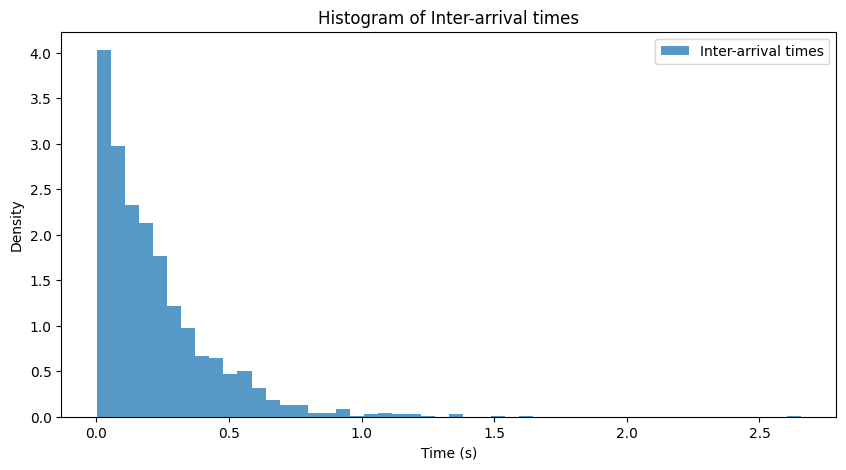

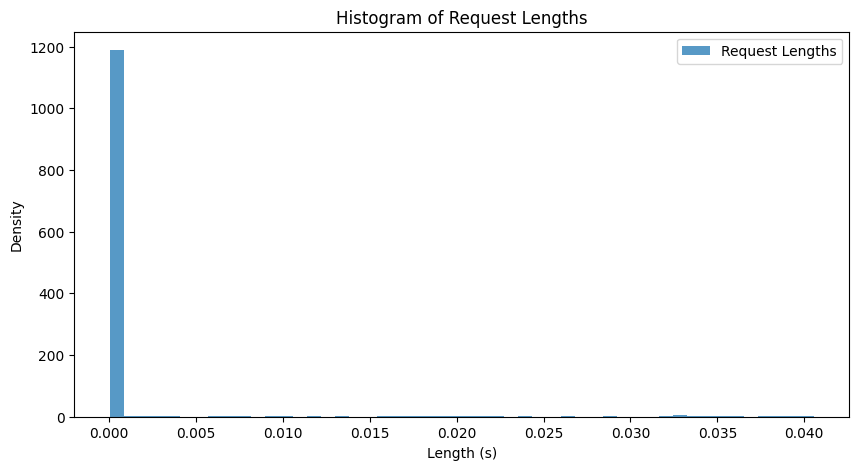

In [13]:
import matplotlib.pyplot as plt

# Read the server output file
with open('server_output.txt', 'r') as file:
    lines = file.readlines()

request_lines = [line.strip() for line in lines if line.startswith('R') or line.startswith('X')]

# Parse the request lines
timestamps1 = []
timestamps2 = []
inter_arrival_times = []
request_lengths = []

prev_timestamp1 = None
for line in request_lines:
    parts = line.split(':')
    data_parts = parts[1].split(',')

    # We are primarily interested in the first 3 values
    timestamp1 = float(data_parts[0])
    timestamp2 = float(data_parts[2])

    # Calculate inter-arrival time
    if prev_timestamp1 is not None:
        inter_arrival_times.append(timestamp1 - prev_timestamp1)
    prev_timestamp1 = timestamp1

    if line.startswith('R'):
        timestamp2 = float(data_parts[2])
        request_lengths.append(timestamp2 - timestamp1)

# Plot inter-arrival times
plt.figure(figsize=(10, 5))
plt.hist(inter_arrival_times, bins=50, density=True, alpha=0.75, label='Inter-arrival times')
plt.title('Histogram of Inter-arrival times')
plt.xlabel('Time (s)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot request lengths
plt.figure(figsize=(10, 5))
plt.hist(request_lengths, bins=50, density=True, alpha=0.75, label='Request Lengths')
plt.title('Histogram of Request Lengths')
plt.xlabel('Length (s)')
plt.ylabel('Density')
plt.legend()
plt.show()


In [14]:
from scipy.stats import norm, expon

# Fit inter-arrival times to normal and exponential distributions
params_normal = norm.fit(inter_arrival_times)
params_expon = expon.fit(inter_arrival_times)

print("Normal distribution parameters for inter-arrival times:", params_normal)
print("Exponential distribution parameters for inter-arrival times:", params_expon)

# Fit request lengths to normal and exponential distributions
params_normal = norm.fit(request_lengths)
params_expon = expon.fit(request_lengths)

print("Normal distribution parameters for request lengths:", params_normal)
print("Exponential distribution parameters for request lengths:", params_expon)


Normal distribution parameters for inter-arrival times: (0.21897305603736866, 0.2182918243871607)
Exponential distribution parameters for inter-arrival times: (2.7999980375170708e-05, 0.2189450560569935)
Normal distribution parameters for request lengths: (0.0008767453328085442, 0.004813469595878166)
Exponential distribution parameters for request lengths: (1.8999999156221747e-05, 0.0008577453336523225)


**Part B:**

Besides some outliers, there is a singular bar in the histogram for request lengths which indicates that the service times are deterministic with almost no variance. This means that each service/request takes approximately the same amount of time. So we have a 'D' for the service distribution.

The inter-arrival times histogram does seem to have a decreasing pattern, which looks like an exponential distribution. So that would be 'M' for the arrival distribution.

With this combo, it appears that the system is an M/D/1 queue.

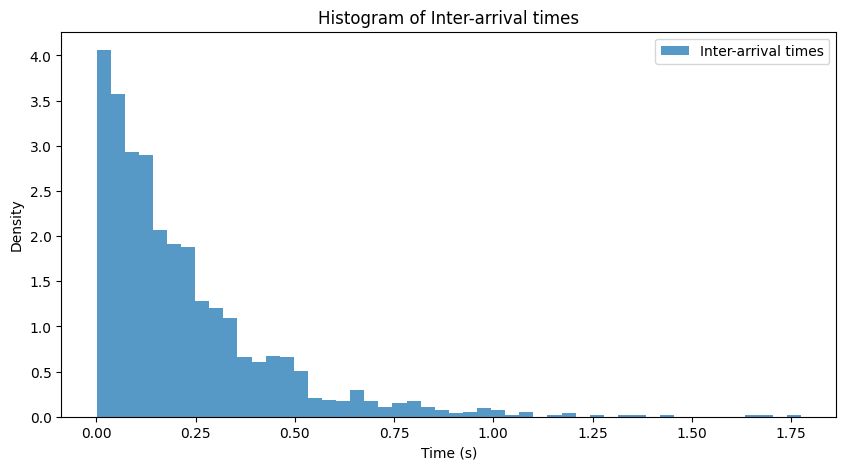

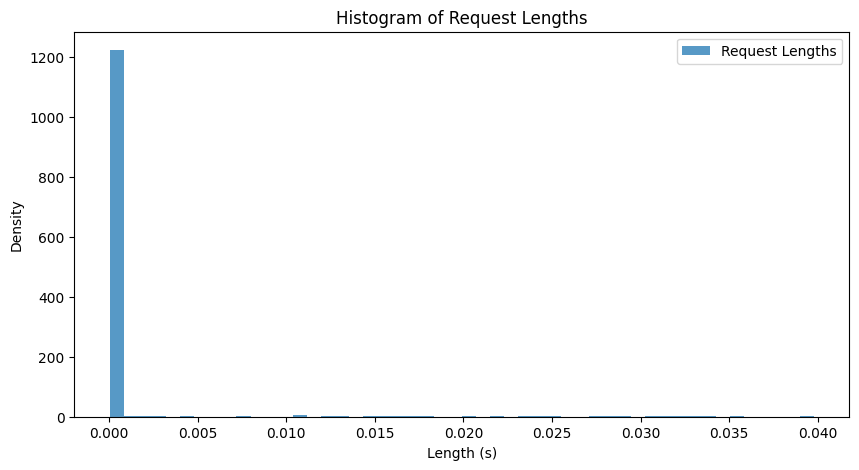

Inter-arrival time: Mean = 0.22s, Standard Deviation = 0.22s
Request length: Mean = 0.00s, Standard Deviation = 0.00s


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Read the server output file
with open('server_output2.txt', 'r') as file:
    lines = file.readlines()

request_lines = [line.strip() for line in lines if line.startswith('R') or line.startswith('X')]

# Parse the request lines
timestamps1 = []
timestamps2 = []
inter_arrival_times = []
request_lengths = []

prev_timestamp1 = None
for line in request_lines:
    parts = line.split(':')
    data_parts = parts[1].split(',')

    # Extract the timestamps
    timestamp1 = float(data_parts[0])
    timestamp2 = float(data_parts[2])

    # Calculate inter-arrival time
    if prev_timestamp1 is not None:
        inter_arrival_times.append(timestamp1 - prev_timestamp1)
    prev_timestamp1 = timestamp1

    # Calculate request length
    if line.startswith('R'):
        timestamp2 = float(data_parts[2])
        request_lengths.append(timestamp2 - timestamp1)

# Plot inter-arrival times
plt.figure(figsize=(10, 5))
plt.hist(inter_arrival_times, bins=50, density=True, alpha=0.75, label='Inter-arrival times')
plt.title('Histogram of Inter-arrival times')
plt.xlabel('Time (s)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot request lengths
plt.figure(figsize=(10, 5))
plt.hist(request_lengths, bins=50, density=True, alpha=0.75, label='Request Lengths')
plt.title('Histogram of Request Lengths')
plt.xlabel('Length (s)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate and print statistics
iat_mean = np.mean(inter_arrival_times)
iat_std = np.std(inter_arrival_times)
rl_mean = np.mean(request_lengths)
rl_std = np.std(request_lengths)

print(f"Inter-arrival time: Mean = {iat_mean:.2f}s, Standard Deviation = {iat_std:.2f}s")
print(f"Request length: Mean = {rl_mean:.2f}s, Standard Deviation = {rl_std:.2f}s")


**Part C:**

When the utilization is comparable, the quality of service perceived by the user is influenced by the distribution of the traffic characteristics. From the graph that I generated, traffic that follows an Exponential Distribution seems to provide better service in terms of shorter response times than Dist. 1. This shows the importance of understanding traffic characteristics when it comes to server performance, as different patterns can lead to significantly different user experiences.

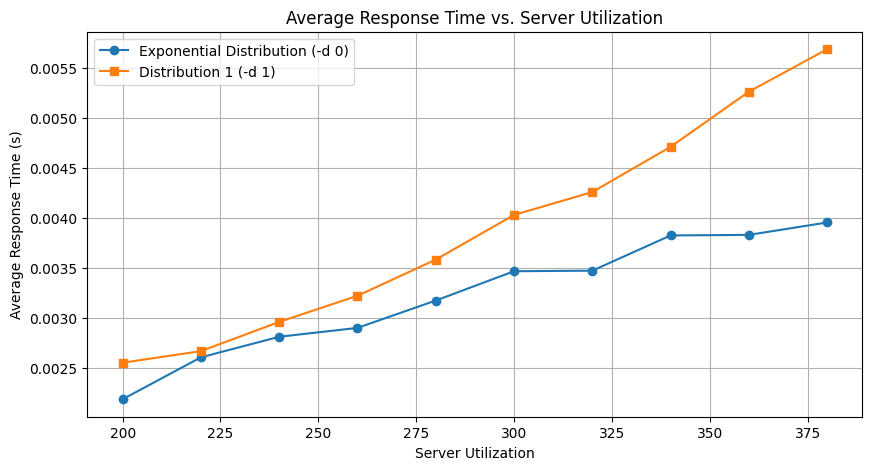

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def extract_response_times(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    request_lines = [line.strip() for line in lines if line.startswith('R') or line.startswith('X')]

    # Extract response times
    response_times = []
    rejected_count = 0  # Count of rejected requests
    for line in request_lines:
        parts = line.split(':')
        data_parts = parts[1].split(',')
        if line.startswith('X'):
            rejected_count += 1
            continue
        start_time = float(data_parts[0])
        end_time = float(data_parts[2])
        response_time = end_time - start_time
        response_times.append(response_time)
    return response_times, rejected_count

# Extract response times for both distributions
response_times_exp, rejected_exp = extract_response_times('server_output3a.txt')
response_times_other, rejected_other = extract_response_times('server_output3b.txt')

# Assuming each arr. rate will produce the same number of results excluding the rejected ones
num_values_per_rate = (len(response_times_exp) + rejected_exp) // 10

# Calculate the total number of requests per arrival rate
total_requests_per_rate = (len(response_times_exp) + len(response_times_other) + rejected_exp + rejected_other) // 20  # assuming 10 rates for each distribution

# Adjust our averaging partitions:
avg_response_exp = [np.mean(response_times_exp[i:i+total_requests_per_rate-rejected_exp//10]) for i in range(0, len(response_times_exp), total_requests_per_rate-rejected_exp//10)]
avg_response_other = [np.mean(response_times_other[i:i+total_requests_per_rate-rejected_other//10]) for i in range(0, len(response_times_other), total_requests_per_rate-rejected_other//10)]

avg_response_exp = avg_response_exp[:len(utilization)]

# Calculate server utilization
service_rate = 1/20  # given -s 20
arrival_rates = list(range(10, 20))
utilization = [arr_rate/service_rate for arr_rate in arrival_rates]


# Now plot the data
plt.figure(figsize=(10, 5))
plt.plot(utilization, avg_response_exp, 'o-', label='Exponential Distribution (-d 0)')
plt.plot(utilization, avg_response_other, 's-', label='Distribution 1 (-d 1)')
plt.xlabel('Server Utilization')
plt.ylabel('Average Response Time (s)')
plt.legend()
plt.grid(True)
plt.title('Average Response Time vs. Server Utilization')
plt.show()


**Part D:**
The distribution produced by running:
./server_lim -q 10 2222 & ./client -a 18 -s 20 -n 1500 -d 0 2222

is pictured below. The distribution has a high peak at the value of 0.0 and tapers off quickly on either side to a more uniform distibrution. I think that this indicates that rejections are spaced closely together for the most part, meaning that there are bursts of rejections.

Bottom line, it seems as though there is a somewhat unpredictable behavior regarding rejections. A rejection can happen almost immediately after the previous one, or there can be a varied delay before the next rejection.

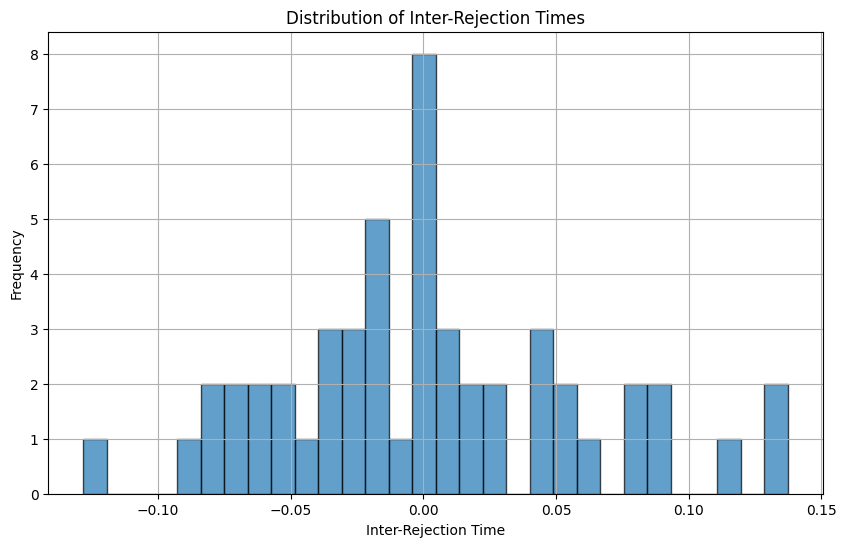

In [8]:
import matplotlib.pyplot as plt
with open("server_output4.txt", "r") as file:
    lines = file.readlines()

# Count total requests and rejections
total_requests = len([line for line in lines if line.startswith(('R', 'X'))])
rejections = len([line for line in lines if line.startswith('X')])

# Calculate rejection ratio
rejection_ratio = rejections / total_requests

rejection_times = [float(line.split(',')[1]) for line in lines if line.startswith('X')]
inter_rejection_times = [rejection_times[i+1] - rejection_times[i] for i in range(len(rejection_times)-1)]

plt.figure(figsize=(10, 6))
plt.hist(inter_rejection_times, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Inter-Rejection Times')
plt.xlabel('Inter-Rejection Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Part E:** The use of -d 2 exhibis a much more consistent rejection pattern. If a request is rejected, the next rejection is very predictable in its timing. This is illustrated in the below plot of inter-rejection times. It is apparent that the time is constant at that 0.01/0.02 mark.

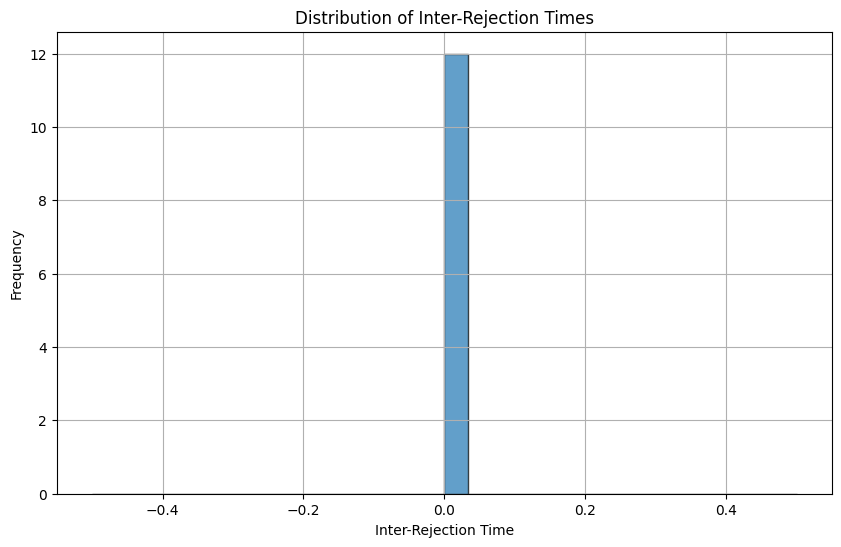

In [10]:
import matplotlib.pyplot as plt
with open("server_output5.txt", "r") as file:
    lines = file.readlines()

# Count total requests and rejections
total_requests = len([line for line in lines if line.startswith(('R', 'X'))])
rejections = len([line for line in lines if line.startswith('X')])

# Calculate rejection ratio
rejection_ratio = rejections / total_requests

rejection_times = [float(line.split(',')[1]) for line in lines if line.startswith('X')]
inter_rejection_times = [rejection_times[i+1] - rejection_times[i] for i in range(len(rejection_times)-1)]

plt.figure(figsize=(10, 6))
plt.hist(inter_rejection_times, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Inter-Rejection Times')
plt.xlabel('Inter-Rejection Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
